#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [ ]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519hw3/optiver files


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-67a1f3db4b5e>", line 6, in <cell line: 6>
    get_ipython().run_line_magic('cd', 'drive/MyDrive/cse519hw3/optiver files')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [ ]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Saving kaggle.json to kaggle.json
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-21f84a3c6fba>", line 3, in <cell line: 3>
    files.upload()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 84, in upload
    with open(local_filename, 'ab') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'kaggle.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IP

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c optiver-trading-at-the-close
# !unzip optiver-trading-at-the-close.zip
!ls

 example_test_files  'kaggle (3).json'	 kaggle.json			     train.csv
'kaggle (1).json'    'kaggle (4).json'	 optiver2023
'kaggle (2).json'    'kaggle (5).json'	 public_timeseries_testing_util.py


#### Q1: Anomalies and Cleaning, 15 pts


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": np.int,
  "date_id":np.int,
  "seconds_in_bucket":np.int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":np.int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":np.int,
  "row_id": "string",
}
dfr = pd.read_csv("train.csv")
dfr.head()


<ipython-input-63-2c78181922e9>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "stock_id": np.int,
<ipython-input-63-2c78181922e9>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details a

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-2c78181922e9>", line 44, in <cell line: 44>
    dfr = pd.read_csv("train.csv")
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f

In [ ]:
#counting the number of null values in the dataset
dfr.isna().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [ ]:
dfr = dfr.dropna(subset=['target'])
dfr['target'].isnull().sum()

0

As it can be inferred from the above information, there were 88 missing values in column(target), therefore dropping those values would make a little to no difference in the dataset.

In [ ]:
dfr.isna().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [ ]:
mean_value = dfr['wap'].mean()
dfr['wap'].fillna(value=mean_value, inplace=True)


mean_value = dfr['imbalance_size'].mean()
dfr['imbalance_size'].fillna(value=mean_value, inplace=True)


mean_value = dfr['matched_size'].mean()
dfr['matched_size'].fillna(value=mean_value, inplace=True)


mean_value = dfr['reference_price'].mean()
dfr['reference_price'].fillna(value=mean_value, inplace=True)


mean_value = dfr['bid_price'].mean()
dfr['bid_price'].fillna(value=mean_value, inplace=True)


mean_value = dfr['ask_price'].mean()
dfr['ask_price'].fillna(value=mean_value, inplace=True)

dfr.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [ ]:
dfr.loc[dfr['seconds_in_bucket'] < 300, 'near_price'] = 0

In [ ]:
dfr.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [ ]:
dfr.loc[dfr['seconds_in_bucket'] < 300, 'far_price'] = 0

In [ ]:
dfr.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [ ]:
median_far_price = dfr['far_price'].median()
dfr['far_price'].fillna(value=median_far_price, inplace=True)

median_ask_price = dfr['near_price'].median()
dfr['near_price'].fillna(value=median_ask_price, inplace=True)

dfr.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


using percentile method

#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

# Assuming your data is stored in a DataFrame named 'df'
# You may need to adjust the column names and data loading based on your actual data structure.

# Step 2: Define the "average" record
average_record = df.groupby(['stock_id', 'date_id'])[['imbalance_size', 'reference_price']].mean().reset_index()

# Step 3: Define the "distance" function
def distance(record1, record2):
    return np.linalg.norm(record1 - record2)

# Step 4: Calculate Pairwise Distances
pairwise_distances = average_record.groupby('stock_id').apply(lambda x: distance(x.iloc[0, 2:], x.iloc[1, 2:])).reset_index()
pairwise_distances.columns = ['stock_id', 'distance']

# Step 5: Autocorrelation Calculation
autocorrelations = []

for k in range(-10, 11):
    autocorrelation = pairwise_distances['distance'].autocorr(lag=k)
    autocorrelations.append(autocorrelation)

# Step 6: Statistical Significance Testing
t_statistic, p_value = ttest_1samp(autocorrelations, 0)

# Step 7: Present Results
print("Autocorrelations:", autocorrelations)
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Autocorrelations: [-0.02003241362995573, -0.07359383212194077, 0.0433781434494297, 0.06760174827475256, -0.05845687455111061, -0.03646421730867567, 0.022481473147825996, -0.028587525876602116, -0.04679969148218584, -0.041693096464330434, 1.0, -0.041693096464330434, -0.04679969148218584, -0.028587525876602116, 0.022481473147825996, -0.03646421730867567, -0.0584568745511106, 0.06760174827475254, 0.0433781434494297, -0.07359383212194077, -0.02003241362995573]
T-statistic: 0.6323036544078098
P-value: 0.5343509460881121


In [ ]:
#b.

import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with stock data and 'stocks' is a list of unique stock IDs

# Step 1: Load Data (Assuming you have a DataFrame named 'df' with columns 'stock_id', 'date_id', and other relevant features)

# Step 2: Define the "distance" function
# You'll need to define a distance metric to measure similarity between pairs of stocks.

def distance(stock1_data, stock2_data):
    # Define your distance metric (e.g., Euclidean distance, correlation, etc.)
    pass

# Step 3: Calculate Pairwise Distances
pairwise_distances = []

for date_id in df['date_id'].unique():
    # Filter data for the specific date
    date_data = df[df['date_id'] == date_id]

    for stock1 in stocks:
        for stock2 in stocks:
            if stock1 != stock2:
                stock1_data = date_data[date_data['stock_id'] == stock1].drop(['stock_id', 'date_id'], axis=1).values
                stock2_data = date_data[date_data['stock_id'] == stock2].drop(['stock_id', 'date_id'], axis=1).values

                # Calculate distance between stock1 and stock2 on this day
                dist = distance(stock1_data, stock2_data)
                pairwise_distances.append({'stock1': stock1, 'stock2': stock2, 'date_id': date_id, 'distance': dist})

# Convert distances to DataFrame for further analysis
pairwise_distances_df = pd.DataFrame(pairwise_distances)

# Step 4: Identify Pairs with Unusually Low Distances
# You may define a threshold for what constitutes an "unusually low" distance

threshold =  # Define your threshold here

unusually_similar_pairs = pairwise_distances_df[pairwise_distances_df['distance'] < threshold]

# Step 5: Analyze Results
# Examine 'unusually_similar_pairs' DataFrame to identify pairs of stocks with consistently low distances.

# Note: You may need to adjust and refine the distance metric and threshold based on your specific use case and dataset.


SyntaxError: ignored

<ipython-input-28-4bb8bf6d57f5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_record = df.groupby('stock_id').mean().reset_index()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


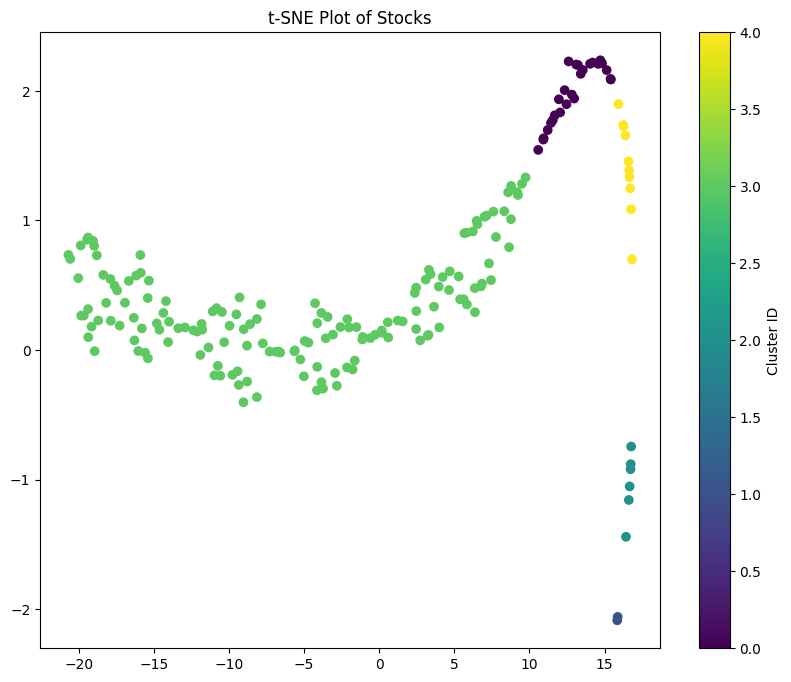

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with stock data

# Step 1: Calculate the "average" or "consensus" record for each stock
average_record = df.groupby('stock_id').mean().reset_index()

# Step 2: Apply a clustering algorithm (e.g., k-means)
# Assuming you want to use K-means with 5 clusters (you can change this based on your data)
num_clusters = 5
X = average_record.drop(['stock_id'], axis=1)

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
average_record['cluster'] = kmeans.labels_

# Step 3: Determine the optimal number of clusters (Optional)
# You may want to experiment with different numbers of clusters and use validation metrics to choose the best one.

# Step 4: Create a TSNE plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=average_record['cluster'], cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('t-SNE Plot of Stocks')
plt.show()


#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


#### Q5: Best prediction model, any approaches, 25 pts


#### Q6: submit model on Kaggle, 0 pts
Public Score: \
Private Score: \
Kaggle profile link: \
Screenshot(s): \
